# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [ ]:
#!pip install plotly
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 1.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]


Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [3]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})


Draw a dispersion diagram (scatter plot) for the data.

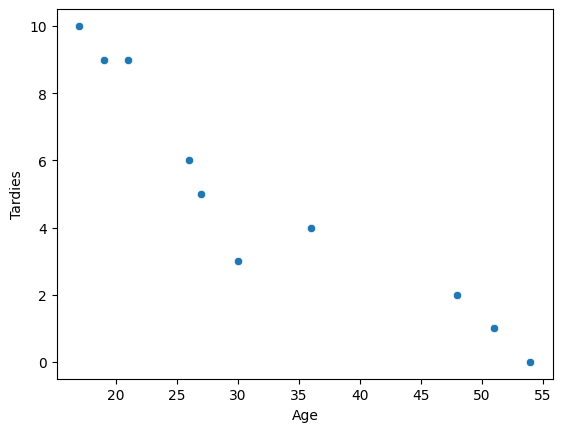

In [5]:
# Your code here
sns.scatterplot(student_data,x='Age',y='Tardies');

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

There could be a negative linear relationship between age and the number of tardies, i.e. we might expect a negative coefficient when fitting a linear model.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [ ]:
# your code here
student_data['Age'].cov(student_data['Tardies'])

np.float64(-45.56666666666666)

In [ ]:
print('Pearson correlation coefficient:', student_data['Age'].corr(student_data['Tardies'],method='pearson'))
print('Spearman correlation coefficient:', student_data['Age'].corr(student_data['Tardies'],method='spearman'))

# 

Pearson correlation coefficient: -0.9391626886887122
Spearman correlation coefficient: -0.9848069807617047


The Pearson correlation coefficient is close to -1, indicating a strong negative linear correlation between age and amount of tardies.
The Spearman correlation coefficient is also close to -1, indicating a strong negative monotonic interaction between the two properties. 

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [16]:
# your explanation here

# define predictor and outcome sets
X = student_data[['Age']]
y = student_data['Tardies']

# Split in train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

lm = LinearRegression()     #  using linear regression model

lm.fit(X_train,y_train)     # fitting 
print(lm.intercept_, lm.coef_)

(10, 1) (8, 1) (2, 1)
(10,) (8,) (2,)
13.46408839779005 [-0.26657459]


Plot your regression model on your scatter plot.

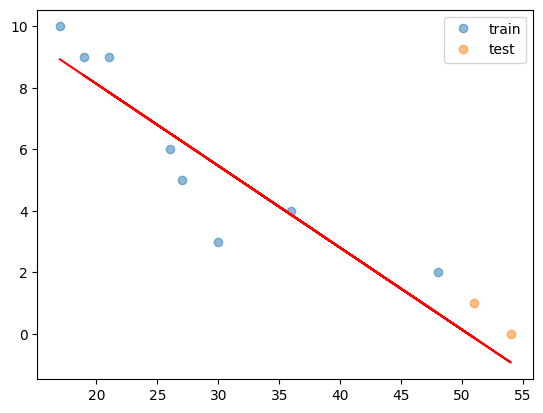

In [21]:
# Your code here.
# Define xmin xmax for the model:

xmin, xmax = round(X.min()), round(X.max())


#x_model = np.arange(xmin, xmax+1)
y_pred=lm.predict(X)

plt.plot(X_train, y_train, "o", alpha=0.5, label="train") # alpha, transparency value, between 0 (transparent) and 1 (opaque).
plt.plot(X_test, y_test, "o", alpha=0.5, label="test") # alpha, transparency value, between 0 (transparent) and 1 (opaque).

plt.plot(X, y_pred,'r'); 

plt.legend()
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

The model relatively closely follows the distribution of the data. Age seems to be a decent predictor for tardiness in this small dataset.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [23]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

In [26]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

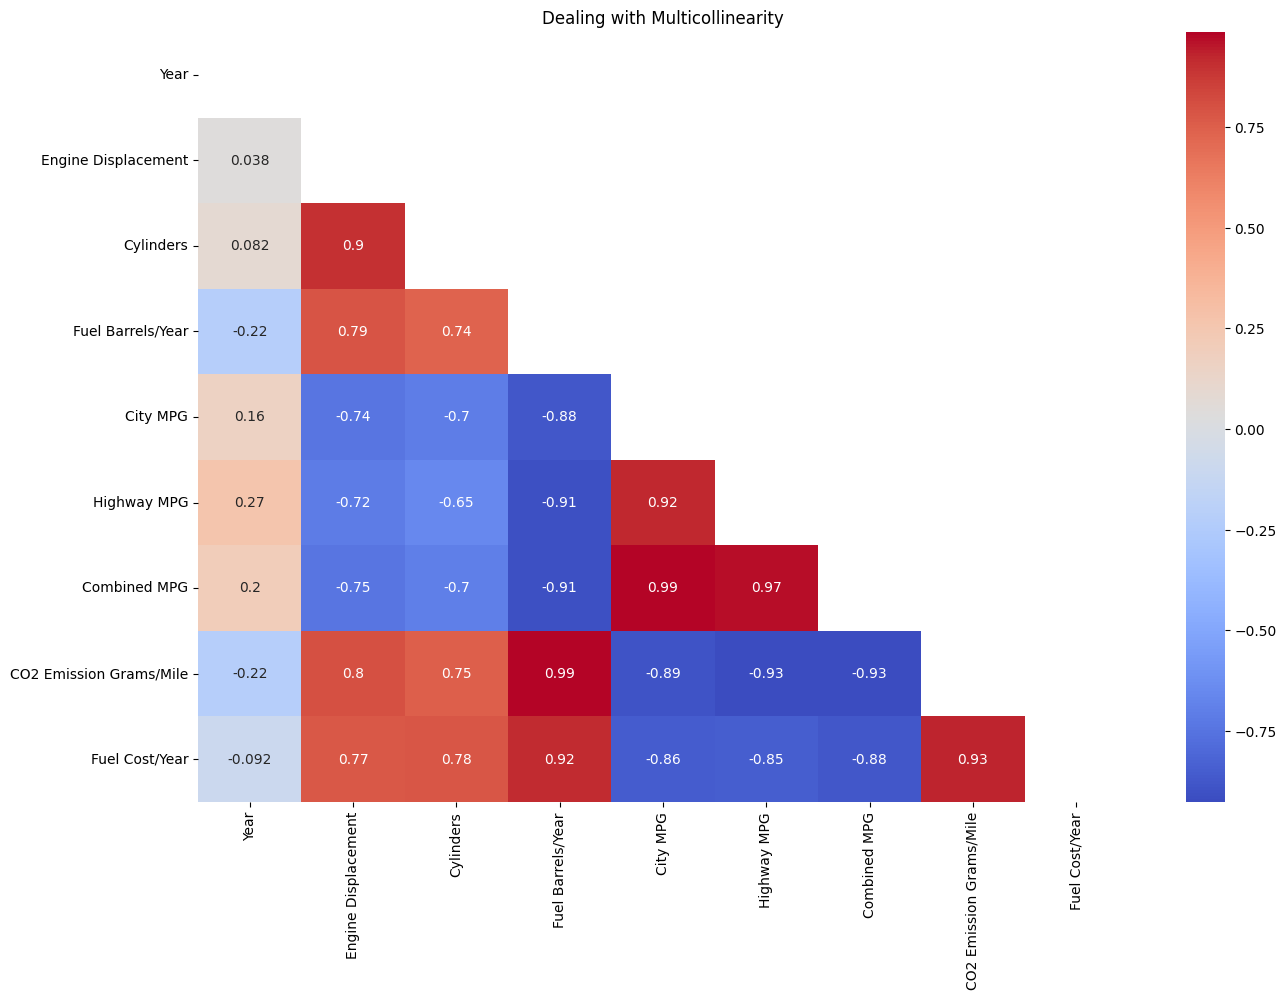

In [34]:
num_veh=vehicles.select_dtypes(include='number')
correlation_matr = num_veh.corr()
mask = np.triu(np.ones_like(correlation_matr, dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matr, mask=mask, annot=True, cmap="coolwarm")

plt.title("Dealing with Multicollinearity")
plt.show()

In [41]:
# Your code here.

X = vehicles[['Year','Cylinders','Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
X_reduced = vehicles[['Year','Fuel Barrels/Year', 'Combined MPG']]

y = vehicles['CO2 Emission Grams/Mile']

X.corrwith(y)

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
dtype: float64

Most important will be `Fuel Barrely/Year` due to its very high positive correlation, with Combined MPG and Fuel Cost/Year also playing an important role. However, the correlation matrix above shows that Fuel Cost/Year also has a high correlation with Fuel Barrels/Year, raising the danger of colinearity. It might be better to exclude one of the parameters from the model (although I refrain from doing so for now to follow the tasks.)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your code here.

# Split in train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


lm = LinearRegression()     # using a multiple linear regression model

lm.fit(X_train,y_train)


LinearRegression()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [36]:
# Your code here.

import statsmodels.api as sm
ols_model = sm.OLS(y_train, X_train).fit()
ols_summary = ols_model.summary()
ols_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          4.960e+06
Date:                     Thu, 29 May 2025   Prob (F-statistic):                        0.00
Time:                             17:56:01   Log-Likelihood:                     -1.2174e+05
No. Observations:                    28761   AIC:                                  2.435e+05
Df Residuals:                        28756   BIC:                                  2.435e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0607      0.001     64.823      0.000       0.059       0.063
Cylinders             0.8274      0.090      9.227      0.000       0.652       1.003
Fuel Barrels/Year    20.0363      0.066    305.443      0.000      19.908      20.165
Combined MPG         -2.9317      0.048    -61.407      0.000      -3.025      -2.838
Fuel Cost/Year        0.0289      0.001     53.559      0.000       0.028       0.030
==============================================================================
Omnibus:                    59660.012   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        276321985.860
Skew:                          17.692   Prob(JB):                         0.00
Kurtosis:                     481.883   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
X_red_train, X_red_test, y_train, y_test = train_test_split(X_reduced, y, test_size=.2, random_state=42)

ols_model_2 = sm.OLS(y_train, X_red_train).fit()
ols_summary_2 = ols_model_2.summary()
ols_summary_2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          7.305e+06
Date:                     Thu, 29 May 2025   Prob (F-statistic):                        0.00
Time:                             18:07:21   Log-Likelihood:                     -1.2352e+05
No. Observations:                    28761   AIC:                                  2.470e+05
Df Residuals:                        28758   BIC:                                  2.471e+05
Df Model:                                3                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0769      0.001     80.389      0.000       0.075       0.079
Fuel Barrels/Year    22.4666      0.056    403.361      0.000      22.357      22.576
Combined MPG         -3.7191      0.049    -76.026      0.000      -3.815      -3.623
==============================================================================
Omnibus:                    64903.459   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        458815282.135
Skew:                          21.539   Prob(JB):                         0.00
Kurtosis:                     620.259   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here.

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [2]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*